# Hands-on 1
$\renewcommand{\ket}[1]{|#1\rangle}$

CUDA-Q is becoming a popular choice for many HPC+QPU installations. Let's do some exercises from their tutorial.

## CUDA-Q

CUDA-Q is an open-source quantum development platform that orchestrates the hardware and software needed to run useful, large-scale quantum computing applications. The platform's hybrid programming model allows computation on GPU, CPU, and QPU resources in tandem from within a single quantum program. CUDA-Q is “qubit-agnostic”—seamlessly integrating with all QPUs and qubit modalities and offering GPU-accelerated simulations when adequate quantum hardware isn't available.

CUDA-Q extends far beyond the NISQ-era, charting a course to large-scale, error-corrected quantum supercomputing with libraries, tools, infrastructure, and a hybrid programming model built for the future of quantum computing. Under the hood, CUDA-Q can be interchangeably powered by industry-leading simulators or actual quantum processors from a growing list of vendors. Both of these engines can leverage AI supercomputing, whether to GPU-accelerate simulations or control and enhance QPU operations.

![cuda-q](https://github.com/osbama/KBM608/blob/main/hands-on/hands-on-1-images/cuda-q-diagram.jpg?raw=1)



In [2]:
!pip install cudaq
!pip install qutip
!pip install matplotlib


## Exploring Qubits

Classical bits always have a completely well-defined state: they are either 0 or 1 at every point during a computation. There is no more detail we can add to the state of a bit than this. So to write down the state of a of classical bit `(c)`, we can just use these two binary values. For example:

$$
c = 0
$$

This restriction is lifted for quantum bits. Whether we get a $0$ or a $1$ from a qubit only needs to be well-defined when a measurement is made to extract an output. At that point, it must commit to one of these two options. At all other times, its state will be something more complex than can be captured by a simple binary value.

To see how to describe these, we can first focus on the two simplest cases. It is possible to prepare a qubit in a state for which it definitely gives the outcome $0$ when measured.

We need a name for this state. Let's be unimaginative and call it *0*. Similarly, there exists a qubit state that is certain to output a $1$. We'll call this *1*. These two states are completely mutually exclusive. Either the qubit definitely outputs a $0$, or it definitely outputs a $1$. There is no overlap. One way to represent this with mathematics is to use two orthogonal vectors.

$$
\left|0\right\rangle= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \qquad \left|1\right\rangle= \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

With vectors we can describe more complex states than just $\left|0\right\rangle$ and $\left|1\right\rangle$. For example, consider the vector

$$
\left|q_0\right\rangle= \begin{pmatrix} \frac{1}{\sqrt{2}}  \\ \frac{i}{\sqrt{2}} \end{pmatrix}
$$

Since the states $\left|0\right\rangle$ and $\left|1\right\rangle$ form an orthonormal basis, we can represent any 2D vector with a combination of these two states. This allows us to write the state of our qubit in the alternative form:

$$
\left|q_0\right\rangle = \frac{1}{\sqrt{2}} \left|0\right\rangle + \frac{i}{\sqrt{2}} \left|1\right\rangle
$$

This vector, $\left|q_0\right\rangle$ is called the qubit's _statevector_, it tells us everything we could possibly know about this qubit. For now, we are only able to draw a few simple conclusions about this particular example of a statevector: it is not entirely $\left|0\right\rangle$ and not entirely $\left|1\right\rangle$. Instead, it is described by a linear combination of the two. In quantum mechanics, we typically describe linear combinations such as this using the word 'superposition'.


Though our example state $\left|q_0\right\rangle$ can be expressed as a superposition of $\left|0\right\rangle$ and $\left|1\right\rangle$, it is no less a definite and well-defined qubit state than they are. To see this, we can begin to explore how a qubit can be manipulated

First, we need to import all the tools we will need:

In [3]:
import sys

try:
    import matplotlib.pyplot as plt
    import qutip

except ImportError:
    print("Tools not found, installing. Please restart your kernel after this is done.")
    !{sys.executable} -m pip install qutip\>=5 matplotlib\>=3.5
    print("\nNew libraries have been installed. Please restart your kernel!")

import cudaq
import numpy as np

### Using CUDA-Q to define and visualize a quantum state

We are now ready to use CUDA-Q!

Let's use CUDA-Q to create the quantum states of single qubits and visualize them on the Bloch sphere.  CUDA-Q uses the `cudaq.kernel` decorator on functions to define quantum states, and, as we will see later, CUDA-Q kernels can also define quantum circuits.  

In [4]:
# Defining the minus state in CUDA-Q

# First we define a vector of complex numbers
# for the coefficients alpha and beta
# of the state |psi> = alpha|0> + beta|1>,
# where alpha = 1/sqrt(2)+0j and beta = -1/sqrt(2)+0j
c = [complex(np.sqrt(2)/2, 0), complex(-np.sqrt(2)/2,0)]

# Define a cudaq.kernel to represent the minus state
@cudaq.kernel
def minus_state():
    q = cudaq.qvector(c)


Once we have defined a kernel, we can call upon the `get_state` command to read out the state from the kernel.  Then, we can add this state to a Bloch sphere using `add_to_bloch_sphere` which is displayed with the `show` command and the file can be saved using the `save` option.

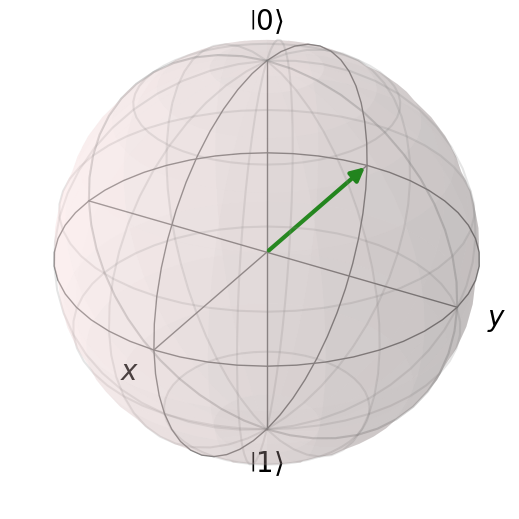

In [5]:
# Visualizing a state in CUDA-Q

# Define a sphere object representing the state of the single qubit
sphere = cudaq.add_to_bloch_sphere(cudaq.get_state(minus_state))

# Display the Bloch sphere
cudaq.show(sphere)

# Save the Bloch sphere image to a file
#sphere.save('MinusState.png')


#### In class exercise
Create a Bloch sphere showing the states: ${0}, \ket{1}, \ket{+}$, and $\ket{i} = \frac{1}{\sqrt{2}}\ket{0}+\frac{i}{\sqrt{2}}\ket{1}$.

Hint: $e^{i\pi} = -1$ and $e^{i\frac{\pi}{2}}=i$.

In [ ]:
# EXERCISE 1

# First we define vectors for the coefficients alpha and beta
# of the states |0>, |1>, |+>, and |i>, where each state is written
# in the form |psi> = alpha|0> + beta|1> . Here alpha and beta are
# of the form:
# alpha = a_real + (a_imaginary)i
# beta = b_real + (b_imaginary)i
# with real values for the coefficients
a_real, a_imaginary, b_real, b_imaginary = None

# c0 is a list of complex coefficients for the state |0>
a_real = np.sqrt(2)/2
a_imaginary = 0
b_real = -np.sqrt(2)/2
b_imaginary = 0

# TODO: DEVAM ET.
c0 = [complex(1, 0), complex(0, 0)]        ###FIX_ME### let this be 0
c1 = [complex(0, 1), complex(1, b_imaginary)]      # list of complex coefficients for the state |1>
c2 = [complex(a_real, a_real), complex(b_real, a_real)]      # list of complex coefficients for the state |+>
c3 = [complex(a_real, a_imaginary), complex(b_real, b_imaginary)]      # list of complex coefficients for the state |i>

list_of_states = [c0,c1,c2,c3]

# Define a cudaq.kernel to represent the state with given coefficients
@cudaq.kernel
def kernel_for_state(c:list[complex]):
    q = cudaq.qvector(c)

# Define a list of Bloch spheres, one sphere for each of the 4 states
blochSphereList = []
# Generate the 4 states by calling the kernel_for_state kernel for each list of coefficients
for c in list_of_states:
    sphere = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel_for_state, c))
    blochSphereList.append(sphere)

# Display the Bloch spheres side by side in 2 rows and 2 columns
cudaq.show(blochSphereList, nrows=2, ncols=2)

## Writing your first quantum programs

Now that we understand qubits and have created quantum state representations in CUDA-Q, let's move on to actual quantum computation. We're ready to write our first quantum program!

The general structure of a quantum program is:
* Encode information into the quantum state by initializing qubit(s)
* Manipulate the quantum state of the qubit(s) with quantum gate(s)
* Extract information from the quantum state by measuring the state of the qubit(s)

These three steps are outlined in the diagram below:
![circuit](https://github.com/osbama/KBM608/blob/main/hands-on/hands-on-1-images/circuit.png?raw=1)


In this section, we'll look at a few simple examples of quantum programs to illustrate these steps.  Throughout the notebook, we'll apply this template to generate and run more interesting examples.  Let's begin with two very simple quantum programs: a bit flip program and a Hello World program. Through these examples, you'll learn about two other important concepts: measurement and superposition.


### Bit Flip

Let's walk through the three steps of writing the Bit Flip program in CUDA-Q. This program is a quantum version of the classical `NOT` operation that flips a bit from $0$ to $1$ and vice versa.

Outline of the Bit Flip program: Going from $\ket{0}$ to $\ket{1}$.
* Initialize the zero state
* Manipulate the quantum state by applying the bit flip gate (the `x` gate)
* Measure the qubit

Let's start by defining a kernel and specifying that this kernel only contains one qubit.  

> **CUDA-Q Quick Tip:**  The `cudaq.qvector` command has two purposes.  When `cudaq.qvector` accepts a `list` as we saw in the `minus_state` example in the previous section, the kernel is initialized in the state corresponding to the coefficients from the list.  In the example below, `cudaq.qvector` will accept an `int` value and will allocate that number of qubits to the kernel.  These qubits, by default, are initialized in the zero-state.

In [10]:
# Writing a bit flip program one step at a time
# Step 1: Create a kernel with one qubit initialized in the zero state


@cudaq.kernel
def bitflip():
    # Allocate one qubit to the kernel. It is by default initialized in the zero state
    qubit = cudaq.qvector(1)

    # Manipulate the quantum state by applying the bit flip gate (the `x` gate)


Let's check to see that the code above initiated a qubit in the zero state by getting the state and plotting it on the Bloch sphere.

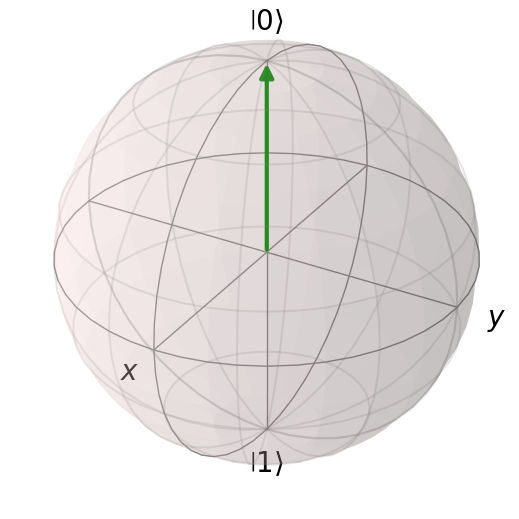

In [11]:
# Visualizing a state of the bitflip kernel before the x gate is applied

# Define a sphere object representing the state of the single qubit
sphere = cudaq.add_to_bloch_sphere(cudaq.get_state(bitflip))

# Display the Bloch sphere
cudaq.show(sphere)

Next we want to manipulate the zero state, $\ket{0}$, and change it to the one state, $\ket{1}$.  One way of doing this is by rotating the Bloch sphere 180 degrees around the x-axis.  Mathematically, this can be carried out through matrix multiplication.  Recall that $\ket{0}=\begin{pmatrix}1\\0\end{pmatrix}$ and $\ket{1}=\begin{pmatrix}0\\1\end{pmatrix}$. Notice that the matrix $X=\begin{pmatrix}0 & 1 \\ 1 & 0 \end{pmatrix}$ has the property that we're looking for.  Namely, multiplying the zero state by $X$ returns the one state: $$X\ket{0} = \ket{1}.$$  

In general, we can change a quantum state through multiplication by a unitary matrix. (The definition of a unitary matrix is not critical for this notebook, but if you're curious you can learn more in [chapter 1 of Quantum Computer Science](http://mermin.lassp.cornell.edu/qcomp/CS483.html).) In the context of a quantum program, we refer to matrix multiplication by a unitary matrix $U$ as applying a $U$-gate.   In CUDA-Q, the $X$-gate ::is implemented with the syntax `x`.

> **CUDA-Q Quick Tip:** You can view all the built-in quantum gate operations in CUDA-Q [here](https://nvidia.github.io/cuda-quantum/latest/api/default_ops.html#unitary-operations-on-qubits).

Let's go ahead and apply the `x`-gate to the qubit in our kernel.



In [12]:
# Writing a bit flip program one step at a time
# Step 2: Apply the X-gate

@cudaq.kernel
def bitflip():
    # Allocate 1 qubit initialized in the zero state
    qubit = cudaq.qvector(1)

    # Manipulate the quantum state by applying the bit flip gate (the `x` gate)
    x(qubit[0]) # Apply the x-gate to the first qubit, which is indexed with 0



Let's use the `get_state` command again to check that the `bitflip` kernel does what we expect, that is, change the state from $\ket{0}$ to $\ket{1}.$

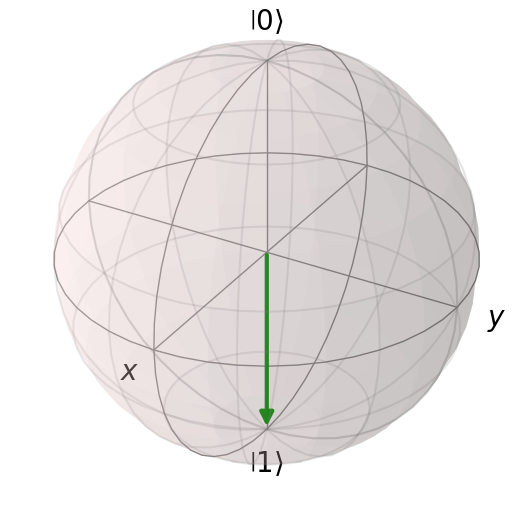

In [13]:
# Visualizing the action of the bitflip kernel

sphere = cudaq.add_to_bloch_sphere(cudaq.get_state(bitflip))
cudaq.show(sphere)

The process of visualizing the state of a kernel on a Bloch sphere using `get_state` is not very efficient and won't be useful when we have many qubits. Firstly, Bloch spheres can only represent the state of a single qubit.  But also, the `get_state` command may be overkill for the amount of information we can or need to recover from several qubits.  As we'll see in the next lab, to describe the state of $n$ qubits we need to compute $2^n$ probability amplitudes. This may be prohibilitively expensive to compute in terms of time and memory resources.

Fortunately, there are other visualization tools that we can use to check the kernels that we create.  Some kernels can be represented as
quantum circuit diagrams. CUDA-Q includes the `cudaq.draw` command to generate an ascii image of the circuit diagram of a kernel.  Basically, each row of the circuit diagram represents a qubit. In this case, we only have one qubit, which by default is named `q0` in the diagram. Operations applied to the qubit are shown as boxes and are read from left to right. Our kernel has only one gate, the `x` gate. We'll discuss these diagrams in more detail later after we've seen a few other examples.

In [14]:
# Drawing the circuit representation of the bit flip kernel

print(cudaq.draw(bitflip))

     ╭───╮
q0 : ┤ x ├
     ╰───╯



> **FAQ:** *What's the difference between a quantum kernel and a quantum circuit?*

> **Answer:** Quantum kernels are more general than quantum circuits.  That is, every quantum circuit is a quantum kernel, but not every quantum kernel is a quantum circuit. Quantum kernels are defined as functions that are executed on a quantum processing unit (QPU) or a simulated QPU. Quantum kernels can be combined with classical functions to create quantum-classical applications that can be executed on a heterogeneous system of QPUs, GPUs, and CPUs to solve real-world problems.

The final step of our first quantum program is to extract information from the quantum state of the qubit.  This is done with the `sample` command. The sample command runs the kernel and takes a measurement `shots_count`-many times

In our example, applying the `x`-gate to the zero state will always result in the one state, unless of course there are errors in the circuit execution.  That's a topic for another day.  Now, we'll assume that all of our kernel executions are error free.  In this case, we would expect to see the one state returned for each kernel execution. Run the cell block below to see the results.

In [ ]:
# Sampling the bit flip kernel
# TOMOGRAPHY
shots = 123
results = cudaq.sample(bitflip, shots_count=shots)

# The output of the sample command looks like a dictionary, but is of a different type
print("Results from sampling {} times: {}\n".format(shots, results))
print("Although the results appear to be of type dict, \n the type of the results from the sample \n command is {}.\n".format(type(results)))

# Often it will be useful to identify the most probable outcome
# and the probability of this outcome
most_probable_result = results.most_probable()
probability = results.probability(most_probable_result)
print("Most probable result: " + most_probable_result)
print("Measured with probability " + str(probability), end='\n\n')


You may notice that the result of executing the `bitflip` kernel is a (classical) $1$, which is technically a different type than the quantum state $\ket{1}$.  Let's look at the Hello World example below which will help illustrate what is going on with the `sample` command and how information is extracted from a quantum state.

> **CUDA-Q Quick Tip:**
The `sample` command runs the kernel and takes a measurement `shots_count`-many times. The result of the `sample` command is a `SampleResult` dictionary of the distribution of the bitstrings resulting from the sampling.
To create a standard Python dictionary of type dict from an object (say `sample_results`) of type `cudaq.SampleResult`, you can use a command such as `asDict = {k:v for k,v in sample_results.items()}`.

### Hello World example

To get a better appreciation how quantum programs differ from classical programs, let's look at a Hello World program, which revisits the minus state kernel and will give us the opportunity to discuss two important concepts: superposition and measurement.

Hello World: Generate and measure the Minus State
* Initialize one qubit in the one-state
* Manipulate the quantum state by transforming it into the minus state
* Extract information from the quantum state by taking measurement(s)

We already created a kernel (`minus_state`) to initialize the minus state by passing a list of coefficients to the `cudaq.qvector` command.  There are other ways to initialize a state if we know the gate operations that generate it. The Hadamard operator applied to $\ket{1}$ generates the state $\ket{-}$.

The Hadamard operator is the matrix $$H =  \frac{1}{\sqrt{2}}\begin{pmatrix} 1&  1 \\ 1 &  -1\end{pmatrix}.$$

Notice that if we multiply $H$ and $\ket{1}$ we get $\ket{-}$:  

$$ H\ket{1} =  \frac{1}{\sqrt{2}}\begin{pmatrix} 1&  1 \\ 1 &  -1\end{pmatrix}\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\   -1\end{pmatrix} = \ket{-}.$$

This calculation suggests a way to generate the minus state:

* First intialize the one state and then apply the Hadamard gate using the CUDA-Q command `h`.  
* This leaves the question: how do we initialize the one state? The answer is implicit in the previous example: apply the `x`-gate to the zero-state.  

We now have a plan, so let's code it up.

In [15]:
# Kernel for the minus state

@cudaq.kernel
def minus_kernel():
    # Allocate a qubit
    qvector = cudaq.qvector(1)

    # Initialize the state |1>
    x(qvector)

    # Apply the Hadamard gate
    h(qvector)

# Draw the circuit to check our work
print(cudaq.draw(minus_kernel))

     ╭───╮╭───╮
q0 : ┤ x ├┤ h ├
     ╰───╯╰───╯



### Exercise 2
Edit the code block below to check your work by graphing the Bloch sphere of the state generated by $\texttt{minus\_kernel}$

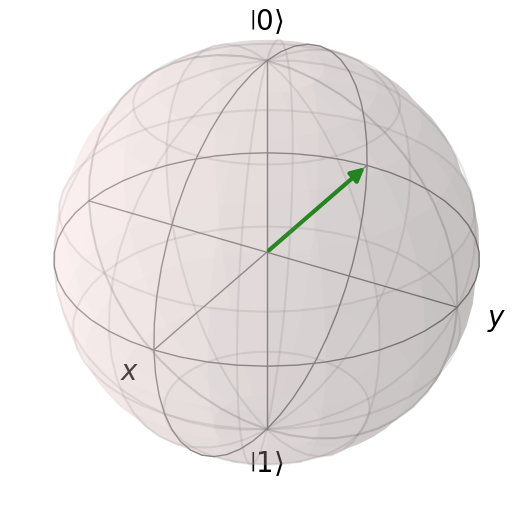

In [16]:
# EXERCISE 2

# Visualizing the action of the minus_kernel

sphere = cudaq.add_to_bloch_sphere(cudaq.get_state(minus_kernel))
cudaq.show(sphere)

Let's sample the `minus_kernel` and examine the results.

In [27]:
# Sampling the minus kernel
shots = 123
results = cudaq.sample(minus_kernel, shots_count=shots)
print("Results from sampling {} times: {}".format(shots, results))

# Often it will be useful to identify the most probable outcome
# and the probability of this outcome
most_probable_result = results.most_probable()
probability = results.probability(most_probable_result)
print("Most probable result: " + most_probable_result)
print("Measured with probability " + str(probability), end='\n\n')

Results from sampling 123 times: { 0:67 1:56 }

Most probable result: 0
Measured with probability 0.5447154471544715



Notice how these results differ from what we saw in the Bit Flip program.  We'll investigate what is going on in this example in more detail in the following section.

## Interpret the results of a quantum program

### Born's Rule

Let's further explore the `minus_kernel` example from the previous section to better understand the `sample` command.  We've copied the codeblock from the previous section here, but we've edited the `shots` variable to equal $1$. Execute the cell block below a couple of times and see if you notice anything.


In [ ]:
# Sampling the minus kernel
shots = 1
results = cudaq.sample(minus_kernel, shots_count=shots)
print("Results from sampling {} time: {}".format(shots, results))



 What do you notice when you run this code block a couple of times?  The result varies.  This is because quantum systems are inherently probabilistic in nature.  You might see that roughly half of the time the outcome will be $0$ and the remaining times, the outcome will be a $1$.  This non-deterministic behavior can be explained by *Born's Rule*.    

 **Born's Rule** roughly states that if a qubit is in the quantum state $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$ with $\alpha$ and $\beta$ complex values satisfying $|\alpha|^2+|\beta|^2 = 1$, then when measured, the outcome will be $0$ with probability $|\alpha|^2$ and $1$ with probability $|\beta|^2$. Furthermore upon measurement, the state of the qubit collapses; that is, the state of the qubit will change to $\ket{0}$ if a $0$ is measured and the qubit will change to $\ket{1}$ if a $1$ is measured.

 Using the visualization tool using [this link](https://nvidia.github.io/cuda-q-academic/quick-start-to-quantum/interactive_widget/borns-rule-widget-sampling.html), explore the connection between the Bloch Sphere representation of the state $\ket{\psi}$ and the probabilities of measuring a 0 or 1.  What effect does changing the angle $\phi$ have on the probability amplitudes?


### Exercise 3

Based on Born's rule, what do you expect the probability of measuring the minus state as $0$ to be?

How does this compare to the results of your execution of the `minus_kernel` in the cell block above?

You might notice that the percentage of times you measure a $0$ is close, but not exactly equal to what Born's rule would predict.

Edit the `###FIX_ME###` line in the code block below to achieve sampling results more closely equal Born's rules prediction.

> [!TIP]
> Think about the [Central Limit Theorem for Proportions](https://2012books.lardbucket.org/books/beginning-statistics/s10-03-the-sample-proportion.html) from statistics. What do you notice as you increase the number of shots?




In [30]:
# EXERCISE 3
# Sampling the minus kernel
shots = 100_000_000
results = cudaq.sample(minus_kernel, shots_count=shots)
print("Results from sampling {} times: {}".format(shots, results))

# Often it will be useful to identify the most probable outcome
# and the probability of this outcome
most_probable_result = results.most_probable()
probability = results.probability(most_probable_result)
print("Most probable result: " + most_probable_result)
print("Measured with probability " + str(probability), end='\n\n')

Results from sampling 100000000 times: { 0:50009611 1:49990389 }

Most probable result: 0
Measured with probability 0.50009611



### Superposition

The concept that distinguishes the Bit Flip program from the Hello World program is superposition.  

**Superposition** is one of the fundamental concepts in quantum mechanics that differentiates quantum computation from classical computation.  A state $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$ is in superposition, if both $\alpha$ and $\beta$ are non-zero.  In other words, $\ket{\psi}$ has a non-zero probability of being measured as a $0$, but also a non-zero probability of being measured as a $1$.  It's important to note that if a qubit is in a state of superposition, when it is measured, it will collapse to either $\ket{0}$ or $\ket{1}$ and will no longer be in superposition.

The $\ket{-}$ state that we examined in the previous section is a state in superposition with the likelihood of measuring a $0$ to be $50\%$ and the likelihood of measuring a $1$ to be $50\%$.  There are other states that are distinct from $\ket{-}$ that are also in a state of equal superposition.  Let's take a look at one of those, the plus state (i.e., $\ket{+}$). In addition to creating and sampling a kernel for the plus state in the code block below, we've used this example to illustrate two other CUDA-Q programming tips:

>**CUDA-Q Quick Tip:** When allocating just one qubit, you can use `qubit()` in place of `qvector(1)`.


In [ ]:

# Kernel for the plus state
@cudaq.kernel
def plus_kernel():

    # Allocate a qubit
    # Initialize the state |0>
    one_qubit = cudaq.qubit()
    # Apply the Hadamard gate
    h(one_qubit)


# Draw the circuit to check our work
print(cudaq.draw(plus_kernel))

# Sampling the minus kernel
shots = 1000
results = cudaq.sample(plus_kernel, shots_count=shots)
print(results)

# Often it will be useful to identify the most probable outcome
# and the probability of this outcome
most_probable_result = results.most_probable()
probability = results.probability(most_probable_result)
print("Most probable result: " + most_probable_result)
print("Measured with probability " + str(probability), end='\n\n')


### More about Measurement

How do the results of sampling the `plus_kernel` compare to those obtained for the `minus_kernel` in the previous section?  What does this seem to apply concerning our ability to distinguish $\ket{+}$ from $\ket{-}$?  

If qubits store information, we would like to be able distinguish two qubits that might be storing different information. For example we might want to distinguish the one-qubit state $\ket{+}$ from the state $\ket{-}$. We'll resolve this issue in the next example by changing the way we measure the two qubits.


### Exercise 4
Create two quantum kernels to sample.  The first will prepare the $\ket{+}$ state and then measure with $\texttt{mx}$.  The second kernel will prepare the $\ket{-}$ state and then measure with $\texttt{mx}$.  


In [ ]:
# EXERCISE 4, TODO: DO THIS

shots = 10

@cudaq.kernel
def plus_measure_x() -> bool:
    q =cudaq.qvector(1)
    ## EDIT CODE BELOW THIS LINE



    ## EDIT CODE ABOVE THIS LINE
    # Specify measurement in either the x,y or z basis with mx, my, or mz
    measurement = mx(q[0])
    return measurement

@cudaq.kernel
def minus_measure_x() -> bool:
    q =cudaq.qvector(1)
    ## EDIT CODE BELOW THIS LINE

    ## EDIT CODE ABOVE THIS LINE
    measurement = mx(q[0])
    return measurement

# Use the run command when measurements are specified in the kernel
results_plus_measure_x = cudaq.run(plus_measure_x, shots_count=shots)
print("Results from running the plus_hadamard kernel {} times: {}".format(shots, results_plus_measure_x))

results_minus_measure_x = cudaq.run(minus_measure_x, shots_count=shots)
print("Results from running the minus_hadamard kernel {} times: {}".format(shots, results_minus_measure_x))

>**CUDA-Q Quick Tip:** By default, when using the `cudaq.sample` execution mode, qubit measurements are conducted on the standard computational basis, which is along the $z$-axis.  In the cell block below, we have added the measurement explicitly with the `mz` command. There are other measurement options `mx` and `my` built into CUDA-Q that we'll experiment with in the next section. When we specify the measurement, instead of using the `cudaq.sample` execution mode, we switch to the `cudaq.run` execution mode.  To learn more about the differences between these execution modes, see the [documentation](https://nvidia.github.io/cuda-quantum/latest/using/examples/executing_kernels.html).

Notice that the results from running the two kernels above differ from one another.  And thus, by switching to measurement with the `mx` command we are able to distinguish the $\ket{+}$ and $\ket{-}$ states. However, there is a drawback &#8212; measuring with `mx` doesn't allow us to distinguish $\ket{0}$ from $\ket{1}$, because of the Uncertainty Principle in quantum mechanics. Test this claim out for yourself by creating and running kernels for the $\ket{0}$ and $\ket{1}$ states using the `mx` measurements.

What is happening when we take a measurement?  What distinguishes the `mz` command from the `mx` command?  Abstractly when we are measuring a state $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$ with `mz`, we are applying Born's rule to the state $\ket{\psi}$. This act of measurement will collapse the state to $\ket{0}$, with a probability $|\alpha|^2$  and will collapse the state of the qubit to  $\ket{1}$ with probability $|\beta|^2$. You can graphically visualize this collapse under a `mz` measurement on the Bloch sphere as projecting the state $\ket{\psi}$ onto the $z$ axis.  

Analogously, when measuring with `mx` we will be collapsing our state $\ket{\psi}$ to either $\ket{+}$ or $\ket{-}$ along the $x$-axis of the Bloch sphere.  We can use Born's Rule for this measurement, too.  The only difference is now instead of writing $\ket{\psi}$ in terms of computational basis states $\ket{0}$ and $\ket{1}$, we'll find coefficients $\gamma$ and $\delta$ so that $\ket{\psi}=\gamma\ket{+}+\delta\ket{-}$. With the `mx`measurement, the probabilities of measuring a $0$ and $1$ are determined by $|\gamma|^2$ and $|\delta|^2$, respectively.
So for the case of $\ket{+}$, the probability of measuring $0$ with `mx` is $100\%$, and for $\ket{-}$ the probability of measuring a $1$ with `mx` is $100\%$. Therefore, `mx` gives us a way to distinguish $\ket{+}$ and $\ket{-}$ with only one shot, assuming there is no noise.

For the remainder of this series of labs, we'll only be measuring with `mz`. To learn more about measurement, check out [chapter 4 of Introduction to Quantum Information Science](https://qubit.guide/4.1-hilbert-spaces-briefly) or [section 2.2.3 of Introduction to Classical and Quantum Computing](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf).